<a href="https://colab.research.google.com/github/Diwakar-Gupta/Data-Science-APRIL/blob/main/22-06-03-KMeans/April_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import plotly.express as px
import matplotlib.pyplot as plt

In [51]:
df = px.data.iris()

df.sample(4)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
33,5.5,4.2,1.4,0.2,setosa,1
85,6.0,3.4,4.5,1.6,versicolor,2
10,5.4,3.7,1.5,0.2,setosa,1
31,5.4,3.4,1.5,0.4,setosa,1


Text(0, 0.5, 'petal_width')

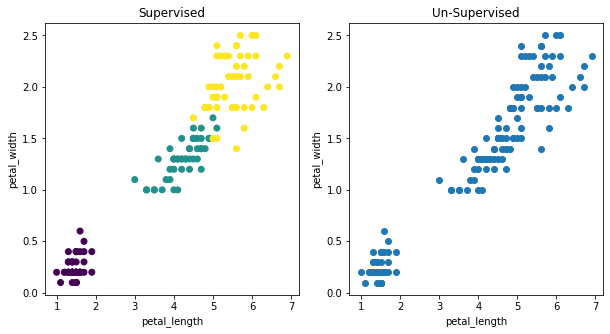

In [52]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

plt.title('Supervised')
plt.scatter(df['petal_length'], df['petal_width'], c=df['species_id'])

plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.subplot(1, 2, 2)
plt.title('Un-Supervised')
plt.scatter(df['petal_length'], df['petal_width'])

plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [53]:
from sklearn.cluster import KMeans

X = df[ ['petal_length', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [54]:
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

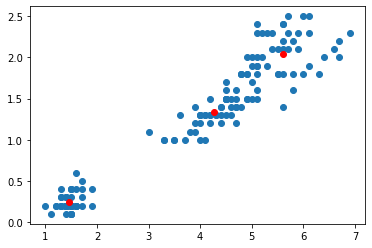

In [55]:
plt.scatter(X['petal_length'], X['petal_width'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red')

plt.show()

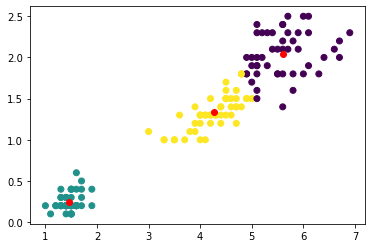

In [56]:
plt.scatter(X['petal_length'], X['petal_width'], c=kmeans.predict(X))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red')

plt.show()

In [57]:
kmeans.inertia_

31.38775897435897

In [58]:

inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

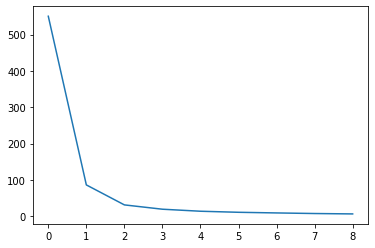

In [59]:
plt.plot(inertia)

In [61]:
from sklearn.metrics import silhouette_score


inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.predict(X))
    inertia.append(score)

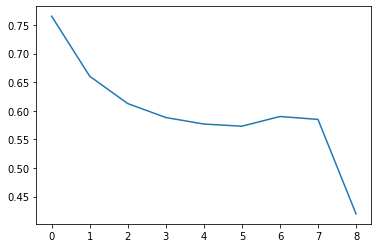

In [62]:
plt.plot(inertia)

# Semi-Supervised

In [27]:
from sklearn.datasets import fetch_openml
import numpy as np

In [25]:
dataset = fetch_openml('mnist_784', version=1)

In [26]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [28]:
X = dataset.data.values
y = np.array(dataset.target)

In [29]:
X.shape, y.shape

((70000, 784), (70000,))

In [31]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=90, test_size=0.5)

In [32]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50

model = LogisticRegression().fit(xtrain[:n_labeled], ytrain[:n_labeled])
model.score(xtest, ytest)

0.6328571428571429

In [33]:
from sklearn.cluster import KMeans

k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(xtrain)

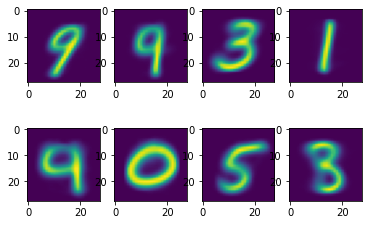

In [39]:
for i in range(8):
    img = kmeans.cluster_centers_[i].reshape(28, 28)
    plt.subplot(2, 4, i+1)
    plt.imshow(img)

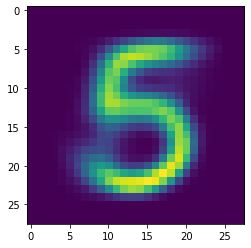

5


In [46]:
from IPython.display import clear_output

ytrain = np.ones(k)

for i in range(k):
    img = kmeans.cluster_centers_[i].reshape(28, 28)
    clear_output(wait=True)
    plt.imshow(img)
    plt.show()
    ytrain[i] = int(input())

In [49]:
model = LogisticRegression().fit(kmeans.cluster_centers_, ytrain)
model.score(xtest, ytest)

0.0